In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes=pd.read_csv("/content/kaggle_diabetes.csv")
diabetes.shape

(2000, 9)

In [ ]:
diabetes.isnull().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [ ]:
diabetes_copy = diabetes.copy(deep=True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
diabetes_copy.isnull().sum()

,0
Pregnancies,0
Glucose,13
BloodPressure,90
SkinThickness,573
Insulin,956
BMI,28
DiabetesPedigreeFunction,0
Age,0
Outcome,0


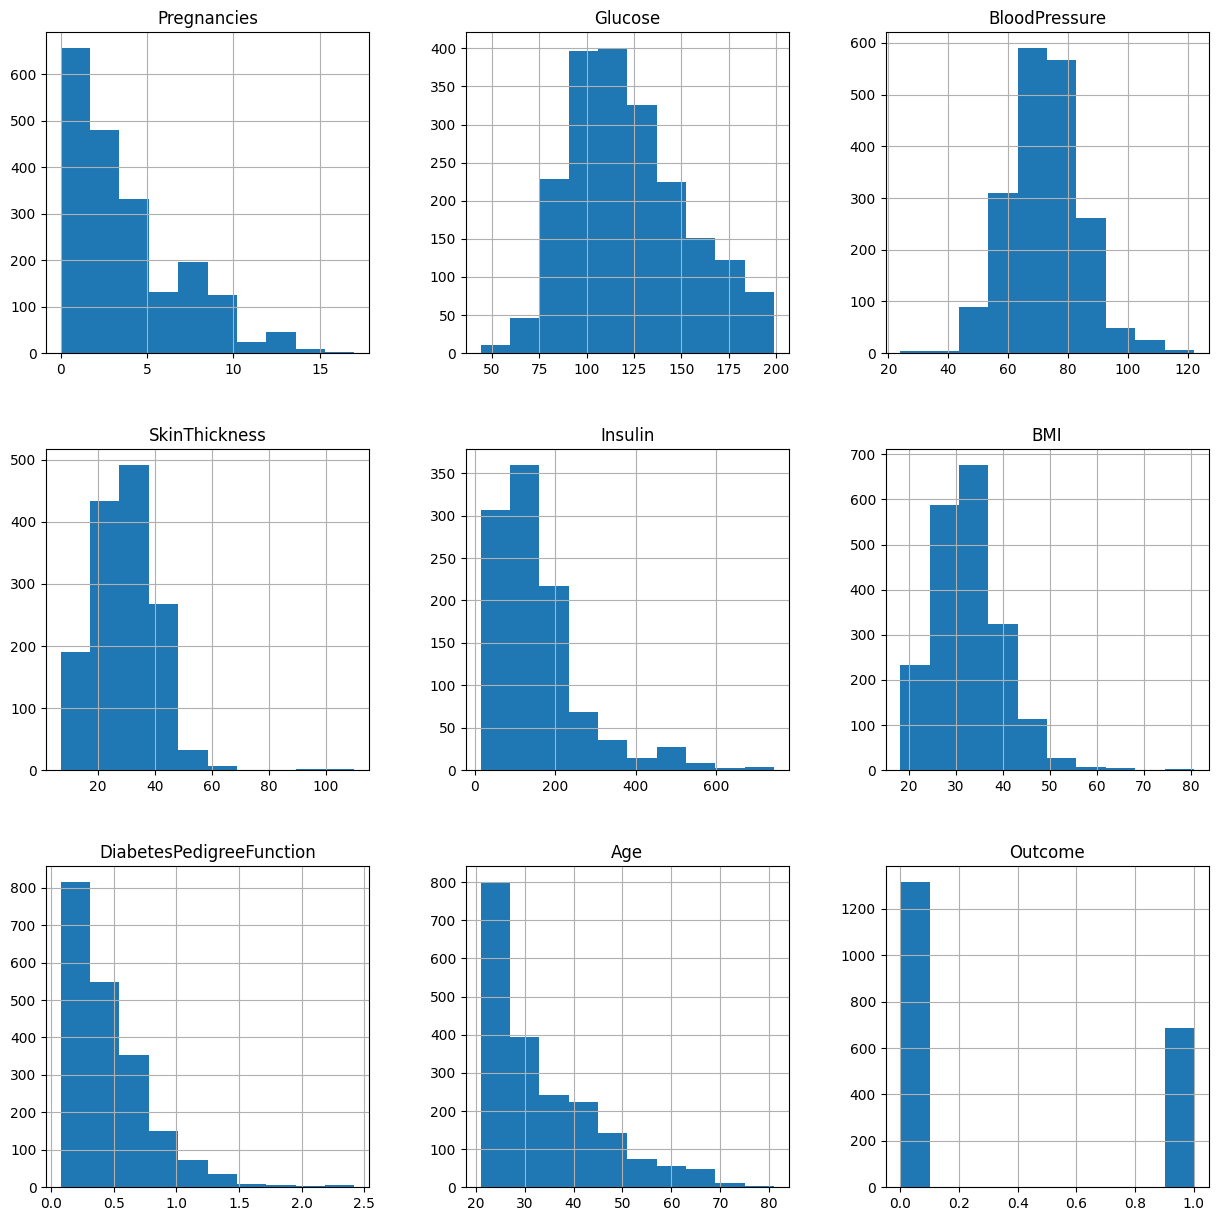

In [ ]:
p = diabetes_copy.hist(figsize = (15,15))

In [ ]:
diabetes_copy.fillna({'Glucose':diabetes_copy['Glucose'].mean()}, inplace=True)
diabetes_copy.fillna({'BloodPressure':diabetes_copy['BloodPressure'].mean()}, inplace=True)
diabetes_copy.fillna({'SkinThickness':diabetes_copy['SkinThickness'].median()}, inplace=True)
diabetes_copy.fillna({'Insulin':diabetes_copy['Insulin'].median()}, inplace=True)
diabetes_copy.fillna({'BMI':diabetes_copy['BMI'].median()}, inplace=True)

In [ ]:
diabetes_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.model_selection import train_test_split

X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
def find_best_model(X, y):

    results = []


    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Logistic Regression
    model1 = LogisticRegression()
    param1 = {'C': [1, 5, 10]}
    grid1 = GridSearchCV(model1, param1, cv=cv)
    grid1.fit(X, y)
    results.append({
        'model': 'Logistic Regression',
        'best_parameters': grid1.best_params_,
        'score': grid1.best_score_
    })

    # Decision Tree
    model2 = DecisionTreeClassifier()
    param2 = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10]}
    grid2 = GridSearchCV(model2, param2, cv=cv)
    grid2.fit(X, y)
    results.append({
        'model': 'Decision Tree',
        'best_parameters': grid2.best_params_,
        'score': grid2.best_score_
    })

    # Random Forest
    model3 = RandomForestClassifier()
    param3 = {'n_estimators': [10, 50, 100]}
    grid3 = GridSearchCV(model3, param3, cv=cv)
    grid3.fit(X, y)
    results.append({
        'model': 'Random Forest',
        'best_parameters': grid3.best_params_,
        'score': grid3.best_score_
    })

    # Support Vector Machine (SVM)
    model4 = SVC()
    param4 = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
    grid4 = GridSearchCV(model4, param4, cv=cv)
    grid4.fit(X, y)
    results.append({
        'model': 'SVM',
        'best_parameters': grid4.best_params_,
        'score': grid4.best_score_
    })


    return pd.DataFrame(results)
find_best_model(X_train, y_train)

,model,best_parameters,score
0,Logistic Regression,{'C': 5},0.763125
1,Decision Tree,"{'criterion': 'gini', 'max_depth': 10}",0.899375
2,Random Forest,{'n_estimators': 100},0.951875
3,SVM,"{'C': 10, 'kernel': 'rbf'}",0.853750


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [ ]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [  5, 123]])

In [ ]:
acc_score=round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(acc_score))

Accuracy on test set: 98.75%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.96      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1044,    0],
       [   1,  555]])

In [ ]:
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.94%


In [ ]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [ ]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
